In [1]:
# ! mkdir ~/.kaggle

In [2]:
# ! cp kaggle.json ~/.kaggle/

In [3]:
# !pip install kaggle

In [4]:
# ! chmod 600 ~/.kaggle/kaggle.json

In [5]:
# ! wget https://drive.google.com/u/0/uc?export=download&confirm=LmSR&id=12EEXQ8B_p-62ArFWd5ZyCK7fWhD-BRup


In [6]:
pip install gdown

In [7]:
! gdown --id 12EEXQ8B_p-62ArFWd5ZyCK7fWhD-BRup --output testData.csv

Downloading...
From: https://drive.google.com/uc?id=12EEXQ8B_p-62ArFWd5ZyCK7fWhD-BRup
To: /content/testData.csv
100% 494M/494M [00:03<00:00, 158MB/s]


In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
import glob
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
from math import pi
import datetime as dt
import missingno as mn
from sklearn.impute import SimpleImputer
from keras import backend as K
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

from sklearn.model_selection import train_test_split

import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow import keras
%matplotlib inline
plt.style.use('seaborn-whitegrid')

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from collections import Counter
import time
import datetime as dt
from datetime import datetime
import collections
import os
import pandas as pd
import seaborn as sns 
from matplotlib.pyplot import rcParams
from sklearn import linear_model


In [9]:
data=pd.read_csv("testData.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [10]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [11]:
data["OriginType"]= data["nameOrig"].apply(lambda x:1 if x[0]=='C' else 0)
data["DestType"]= data["nameDest"].apply(lambda x:1 if x[0]=='C' else 0)

In [12]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,OriginType,DestType
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1,0


In [13]:
# def print_unique_col_values(df):
#        for column in df:
#                 # print(f'{column}: {df[column].unique()}') 

In [14]:
# print_unique_col_values(data)

In [15]:
# data[data.isFlaggedFraud==1].shape

In [16]:
data["Day"]=data["step"].apply(lambda x: x//24+1)
data["Hour"]=data["step"].apply(lambda x: x%24)

In [17]:
data=data.drop(["step","nameOrig","nameDest"],axis="columns")

In [18]:
data=pd.get_dummies(data=data,columns=['type'])

In [19]:

# dt2=data[data.newbalanceDest-data.oldbalanceDest!=data.oldbalanceOrg-data.newbalanceOrig ]
# dt2[dt2.DestType==1]

In [20]:
data["DestTransAmount"]=data.newbalanceDest-data.oldbalanceDest
data["origTransAmount"]=data.oldbalanceOrg-data.newbalanceOrig

In [21]:
data.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,OriginType,DestType,Day,Hour,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,DestTransAmount,origTransAmount
0,9839.64,170136.0,160296.36,0.0,0.0,0,0,1,0,1,1,0,0,0,1,0,0.0,9839.64
1,1864.28,21249.0,19384.72,0.0,0.0,0,0,1,0,1,1,0,0,0,1,0,0.0,1864.28
2,181.00,181.0,0.00,0.0,0.0,1,0,1,1,1,1,0,0,0,0,1,0.0,181.00
3,181.00,181.0,0.00,21182.0,0.0,1,0,1,1,1,1,0,1,0,0,0,-21182.0,181.00
4,11668.14,41554.0,29885.86,0.0,0.0,0,0,1,0,1,1,0,0,0,1,0,0.0,11668.14


In [22]:
# dt3=data[data.origTransAmount>data.DestTransAmount]
# dt3=dt3[dt3.DestType==1]
# dt3[dt3.type_CASH_IN==1]

In [23]:
# del dt3

In [24]:
# data[(data.origTransAmount>data.DestTransAmount) & (data.type_CASH_IN==1)]

In [25]:
# tenure_churn_no = data[data.isFraud==0].amount
# tenure_churn_yes = data[data.isFraud==1].amount

# plt.xlabel("")
# plt.ylabel("Number Of Customers")
# plt.title("fraud Visualisation")

# plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Fraud=Yes','Fraud=No'])
# plt.legend()

In [26]:
# f,ax =plt.subplots(figsize=(18,18))
# sns.heatmap(data.corr(),annot=True,linewidths=5,fmt='.1f',ax=ax)
# plt.show()

In [27]:
# data[((data.origTransAmount- data.DestTransAmount)>1) & (data.isFraud==1)]

In [28]:
x=data.drop(["isFraud"],axis="columns")
y=data["isFraud"]

In [29]:
# from sklearn.datasets import make_classification
# from imblearn.under_sampling import RandomUnderSampler
# undersample = RandomUnderSampler(sampling_strategy='majority')
# # fit and apply the transform
# X_over, y_over = undersample.fit_resample(x, y)

In [30]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
undersample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = undersample.fit_resample(x, y)

In [31]:
X_over[:10]

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,OriginType,DestType,Day,Hour,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,DestTransAmount,origTransAmount
0,9839.64,170136.00,160296.36,0.0,0.00,0,1,0,1,1,0,0,0,1,0,0.00,9839.64
1,1864.28,21249.00,19384.72,0.0,0.00,0,1,0,1,1,0,0,0,1,0,0.00,1864.28
2,181.00,181.00,0.00,0.0,0.00,0,1,1,1,1,0,0,0,0,1,0.00,181.00
3,181.00,181.00,0.00,21182.0,0.00,0,1,1,1,1,0,1,0,0,0,-21182.00,181.00
4,11668.14,41554.00,29885.86,0.0,0.00,0,1,0,1,1,0,0,0,1,0,0.00,11668.14
5,7817.71,53860.00,46042.29,0.0,0.00,0,1,0,1,1,0,0,0,1,0,0.00,7817.71
6,7107.77,183195.00,176087.23,0.0,0.00,0,1,0,1,1,0,0,0,1,0,0.00,7107.77
7,7861.64,176087.23,168225.59,0.0,0.00,0,1,0,1,1,0,0,0,1,0,0.00,7861.64
8,4024.36,2671.00,0.00,0.0,0.00,0,1,0,1,1,0,0,0,1,0,0.00,2671.00
9,5337.77,41720.00,36382.23,41898.0,40348.79,0,1,1,1,1,0,0,1,0,0,-1549.21,5337.77


In [32]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
scaled_X = sx.fit_transform(X_over)

In [33]:
scaled_X[:].shape

(12708814, 17)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X,y_over,test_size=0.2,random_state=5)

In [35]:
X_train.shape

(10167051, 17)

In [36]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(17,), activation='linear'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
317721/317721 [==============================] - 690s 2ms/step - loss: 0.0605 - accuracy: 0.9783
Epoch 2/5
317721/317721 [==============================] - 688s 2ms/step - loss: 0.0359 - accuracy: 0.9875
Epoch 3/5
317721/317721 [==============================] - 683s 2ms/step - loss: 0.0319 - accuracy: 0.9892
Epoch 4/5
119739/317721 [==========>...................] - ETA: 7:08 - loss: 0.0300 - accuracy: 0.9899

KeyboardInterrupt: ignored

In [37]:
model.evaluate(X_test, y_test)

79431/79431 [==============================] - 118s 1ms/step - loss: 0.0317 - accuracy: 0.9890


[0.03165682777762413, 0.9890379309654236]

In [38]:
y_pred=model.predict(X_test)

In [39]:
y_pred[:10]

array([[1.0066509e-04],
       [1.0066509e-04],
       [2.0581484e-04],
       [1.0066509e-04],
       [1.0066509e-04],
       [3.2465911e-01],
       [9.6716577e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [6.4519048e-04]], dtype=float32)

In [40]:
ypredF = []
for element in y_pred:
    if element > 0.5:
        ypredF.append(1)
    else:
        ypredF.append(0)


In [41]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,ypredF))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1270887
           1       0.98      1.00      0.99   1270876

    accuracy                           0.99   2541763
   macro avg       0.99      0.99      0.99   2541763
weighted avg       0.99      0.99      0.99   2541763



In [42]:
xFtest=sx.fit_transform(x)


In [43]:
yFtestPred=model.predict(xFtest)

In [44]:
ytestpredF = []
for element in yFtestPred:
    if element > 0.5:
        ytestpredF.append(1)
    else:
        ytestpredF.append(0)

In [45]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y,ytestpredF))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99   6354407
           1       0.07      1.00      0.13      8213

    accuracy                           0.98   6362620
   macro avg       0.53      0.99      0.56   6362620
weighted avg       1.00      0.98      0.99   6362620



Text(72.5, 0.5, 'Truth')

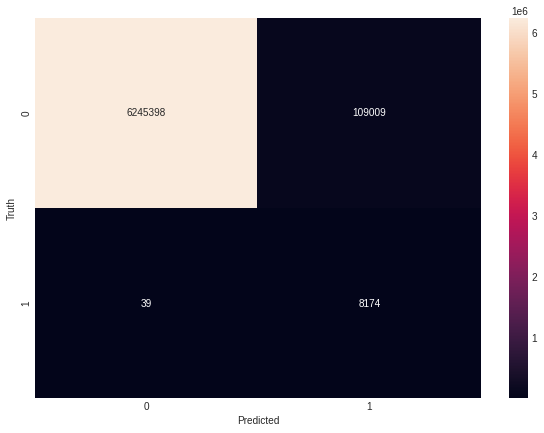

In [46]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y,predictions=ytestpredF)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [47]:
model.evaluate(xFtest,y)

198832/198832 [==============================] - 301s 2ms/step - loss: 0.0416 - accuracy: 0.9829


[0.04161478579044342, 0.9828611612319946]